In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

eda_df = pd.read_csv('/content/drive/MyDrive/capstone/data/eda_df.csv')

### Graph Functions

In [ ]:
def scatter_plot(df, xcol, ycol, group_col='level', s=None, legend=False):
  df_avg = df.groupby(group_col).mean().reset_index()
  df_avg_regular = df_avg[df_avg.level != -1]
  df_avg_outlier = df_avg[df_avg.level == -1]
  kwargs_reg = {'x':xcol
              ,'y': ycol
              ,'data':df_avg_regular
              ,'hue':group_col
              ,'palette':'mako'
              ,'legend': legend
              }
  if s:
    kwargs_reg['size'] = s
  ax = sns.scatterplot(**kwargs_reg)
  ax.scatter(df_avg_outlier[xcol], df_avg_outlier[ycol], c='red')
  if legend:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


### Overall Stats

features:
*   kda_ratio
*   avg_lifetime
*   score_per_game
*   player_perc_headshots
*   player_perc_accuracy
*   player_perc_wins

Outlier averages are represented with the red dots
The 'regular' player dots are colored from dark (low-level) to light (high-level)

In [ ]:
#doing eda on a dataset that contains level labels to see if there's any groupings
overall_stats_cols = ['kda_ratio'
                  ,'avg_lifetime'
                  ,'score_per_game'
                  ,'player_perc_headshots'
                  ,'player_perc_accuracy'
                  ,'player_perc_wins']

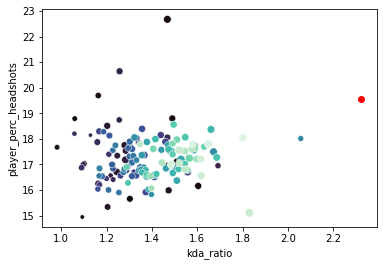

In [ ]:
scatter_plot(eda_df,'kda_ratio','player_perc_headshots', s='player_perc_accuracy')

Percentage headshots seemed grouped together so I'm not surpised by the lack of spread between levels. 

Outliers seem to have a very high KDA compared to the rest of the group

#### KDA Ratio and Accuracy 

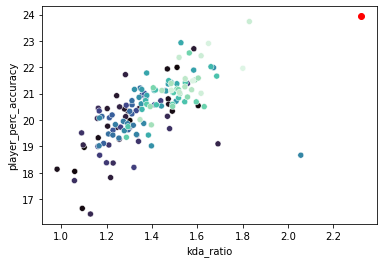

In [ ]:
scatter_plot(eda_df,'kda_ratio','player_perc_accuracy')

Seems like players generally have a higher KDA and accuracy score as their level increases.

Hopefully more data will make the trends more apparent 

Unusuallly high KDA and Accuracy for the outlier groups

#### Using KDA Ratio to tease out other features that separate the cheaterz
KDA Ratio & Score per game

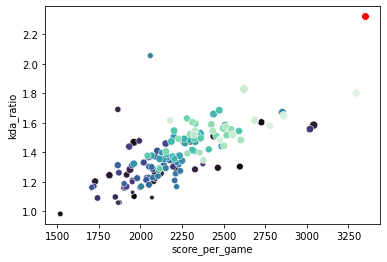

In [ ]:
scatter_plot(eda_df,'score_per_game','kda_ratio', s='player_perc_accuracy')

Beautiful. Still pretty jumbled in the 55-155 range but the outliers clearly surpass the average on both metrics

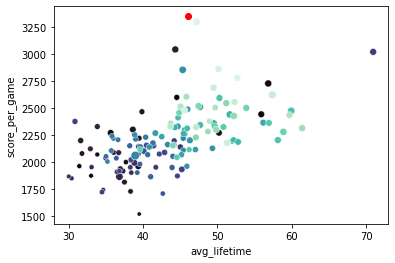

In [ ]:
scatter_plot(eda_df,'avg_lifetime','score_per_game', s='kda_ratio')

Looks like the target class *somehow* scores a massive amount of points within a short time window.

## Match Statistics
*Note: These statistics are from each player's last 5 games. The COD API has a reCaptcha on their login due to a crackdown on third party stat tracking websites, so I'm unable to pull a lifetime match history ...at the moment.*

features: 
*   score
*   match_accuracy
*   match_time_played
*   match_headshot_count
*   match_score_per_minute
*   match_shot_count
*   match_hit_count
*   match_total_xp
*   medalxp
*   match_longest_streak

#### Match score and accuracy

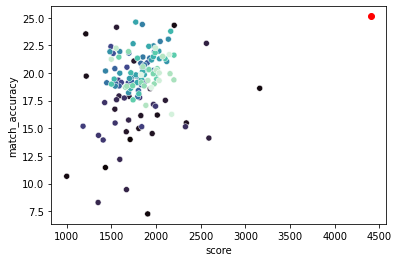

In [ ]:
scatter_plot(eda_df,'score','match_accuracy')

Looks like match score could be an excellent feature for labeling the hackers  

#### Match headshot count and time played

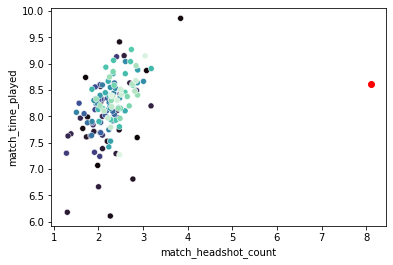

In [ ]:
scatter_plot(eda_df,'match_headshot_count','match_time_played')

Match time played mirrors overall time played stats, the outliers seem to fall within the group. However, match headshot count truly separates the cheaters from the rest

#### Match headshot count and shot count

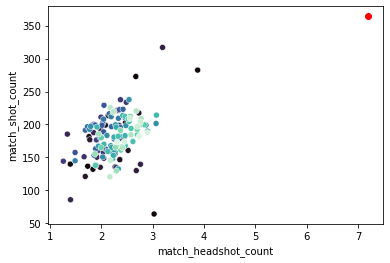

In [ ]:
scatter_plot(eda_df,'match_headshot_count','match_shot_count')

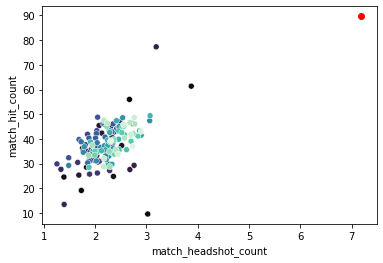

In [ ]:
scatter_plot(eda_df,'match_headshot_count','match_hit_count')

So, these game hacks allow a player to spray bullets and rake in headshots with an extremely high accuracy. I need to ask these players a few questions.

## New Discoveries

I've recently found out that ranks (aka levels) reset after every season if you're above a certain level. So, a lot of my mid-upper tier players aren't their 'true' ranks.

Due to this revelation, I'll be building a classifier that identifies whether or not an individual is using software to enhance their gameplay.

DON'T. MODEL. GAMES. YOU. DON'T. PLAY. (Witcher 3 wya?)

41.0

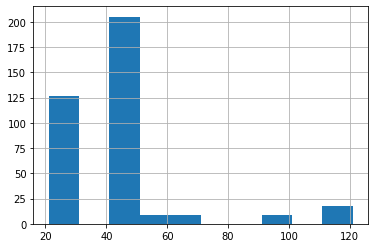

In [ ]:
df[df['level'] == 60]['avg_lifetime'].hist()
df[df['level'] == 60]['avg_lifetime'].unique()
df['avg_lifetime'].median()

As seen above, for most of my features in the levels between 55-155, there are two distinct groups. I could probably filter with the median and reassign if need be.